In [150]:
# Выполним инициализацию основных используемых модулей
%matplotlib inline
%pylab inline

import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [59]:
with open('checkins.csv') as f:
    print(f.readline())  # пропуск заголовочной строки
    print(f.readline())
    print(f.readline())
    #data = np.loadtxt(f, delimiter='|')

   id    | user_id | venue_id |     latitude      |     longitude     |     created_at      

---------+---------+----------+-------------------+-------------------+---------------------

  984301 | 2041916 |     5222 |                   |                   | 2012-04-21 17:39:01



In [60]:
# first get all lines from file
with open('checkins.csv', 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.replace(' ', '') for line in lines]

In [61]:
lines

['id|user_id|venue_id|latitude|longitude|created_at\n',
 '---------+---------+----------+-------------------+-------------------+---------------------\n',
 '984301|2041916|5222|||2012-04-2117:39:01\n',
 '984222|15824|5222|38.8951118|-77.0363658|2012-04-2117:43:47\n',
 '984315|1764391|5222|||2012-04-2117:37:18\n',
 '984234|44652|5222|33.800745|-84.41052|2012-04-2117:43:43\n',
 '984249|2146840|5222|||2012-04-2117:42:58\n',
 '984268|2146843|5222|||2012-04-2117:42:38\n',
 '984281|2146846|5222|||2012-04-2117:39:40\n',
 '984291|105054|5222|45.5234515|-122.6762071|2012-04-2117:39:22\n',
 '6651|1338710|219703|||2011-12-0823:11:23\n',
 '984318|2146539|5222|40.764462|-111.904565|2012-04-2117:35:46\n',
 '984232|93870|380645|33.4483771|-112.0740373|2012-04-2117:38:18\n',
 '984483|1030290|955969|32.2217429|-110.926479|2012-04-2117:58:54\n',
 '984685|304253|23558|40.65|-73.95|2012-04-2118:19:34\n',
 '984470|720850|749715|33.4483771|-112.0740373|2012-04-2117:02:47\n',
 '984500|54536|63452|||2012-04-2

In [62]:
del(lines[1])

In [63]:
lines

['id|user_id|venue_id|latitude|longitude|created_at\n',
 '984301|2041916|5222|||2012-04-2117:39:01\n',
 '984222|15824|5222|38.8951118|-77.0363658|2012-04-2117:43:47\n',
 '984315|1764391|5222|||2012-04-2117:37:18\n',
 '984234|44652|5222|33.800745|-84.41052|2012-04-2117:43:43\n',
 '984249|2146840|5222|||2012-04-2117:42:58\n',
 '984268|2146843|5222|||2012-04-2117:42:38\n',
 '984281|2146846|5222|||2012-04-2117:39:40\n',
 '984291|105054|5222|45.5234515|-122.6762071|2012-04-2117:39:22\n',
 '6651|1338710|219703|||2011-12-0823:11:23\n',
 '984318|2146539|5222|40.764462|-111.904565|2012-04-2117:35:46\n',
 '984232|93870|380645|33.4483771|-112.0740373|2012-04-2117:38:18\n',
 '984483|1030290|955969|32.2217429|-110.926479|2012-04-2117:58:54\n',
 '984685|304253|23558|40.65|-73.95|2012-04-2118:19:34\n',
 '984470|720850|749715|33.4483771|-112.0740373|2012-04-2117:02:47\n',
 '984500|54536|63452|||2012-04-2118:07:26\n',
 '984610|1639666|442605|33.414768|-111.9093095|2012-04-2118:04:58\n',
 '984722|156675

In [72]:
i_delete = []
for i in range (len(lines)):
    if(lines[i].find('|||')!=-1):
        i_delete.append(i)
        #print(lines[i])
        #lines[i].replace("||",'')
        #print(lines[i])


In [73]:
i_delete

[1,
 3,
 5,
 6,
 7,
 9,
 15,
 17,
 18,
 22,
 23,
 24,
 25,
 29,
 31,
 32,
 33,
 34,
 37,
 38,
 40,
 44,
 45,
 46,
 49,
 52,
 57,
 59,
 61,
 63,
 64,
 66,
 67,
 68,
 71,
 72,
 74,
 77,
 79,
 80,
 83,
 84,
 85,
 87,
 89,
 90,
 93,
 95,
 99,
 100,
 103,
 104,
 106,
 108,
 110,
 114,
 115,
 117,
 119,
 120,
 121,
 125,
 126,
 127,
 129,
 131,
 132,
 133,
 135,
 136,
 140,
 142,
 144,
 145,
 146,
 147,
 148,
 159,
 160,
 166,
 169,
 170,
 174,
 178,
 179,
 182,
 185,
 186,
 187,
 189,
 192,
 195,
 197,
 198,
 204,
 206,
 207,
 209,
 210,
 213,
 215,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 227,
 229,
 232,
 235,
 239,
 240,
 241,
 243,
 244,
 247,
 248,
 255,
 259,
 260,
 261,
 263,
 268,
 269,
 270,
 276,
 278,
 279,
 282,
 283,
 287,
 291,
 301,
 303,
 305,
 306,
 309,
 311,
 313,
 315,
 316,
 321,
 325,
 329,
 331,
 333,
 335,
 337,
 338,
 341,
 342,
 347,
 352,
 354,
 357,
 361,
 362,
 364,
 367,
 368,
 370,
 373,
 375,
 376,
 378,
 379,
 380,
 381,
 384,
 385,
 386,
 387,
 390,

In [76]:
i_delete.reverse()

In [77]:
i_delete

[1021966,
 1021964,
 1021959,
 1021957,
 1021952,
 1021951,
 1021949,
 1021947,
 1021946,
 1021945,
 1021943,
 1021942,
 1021939,
 1021938,
 1021936,
 1021935,
 1021934,
 1021933,
 1021932,
 1021931,
 1021930,
 1021929,
 1021928,
 1021927,
 1021925,
 1021923,
 1021922,
 1021921,
 1021920,
 1021918,
 1021915,
 1021914,
 1021912,
 1021911,
 1021910,
 1021909,
 1021908,
 1021907,
 1021906,
 1021905,
 1021904,
 1021901,
 1021900,
 1021898,
 1021895,
 1021894,
 1021893,
 1021892,
 1021890,
 1021889,
 1021887,
 1021884,
 1021882,
 1021881,
 1021878,
 1021877,
 1021876,
 1021875,
 1021870,
 1021869,
 1021867,
 1021865,
 1021864,
 1021863,
 1021862,
 1021861,
 1021860,
 1021858,
 1021857,
 1021856,
 1021855,
 1021854,
 1021853,
 1021850,
 1021849,
 1021847,
 1021846,
 1021844,
 1021841,
 1021840,
 1021839,
 1021837,
 1021835,
 1021833,
 1021832,
 1021830,
 1021829,
 1021828,
 1021825,
 1021823,
 1021822,
 1021821,
 1021817,
 1021815,
 1021814,
 1021812,
 1021807,
 1021806,
 1021805,
 1021803,


In [79]:
for i in i_delete:
    lines.pop(i)

In [80]:
del(lines[-1])
del(lines[-1])
lines

['id|user_id|venue_id|latitude|longitude|created_at\n',
 '984222|15824|5222|38.8951118|-77.0363658|2012-04-2117:43:47\n',
 '984234|44652|5222|33.800745|-84.41052|2012-04-2117:43:43\n',
 '984291|105054|5222|45.5234515|-122.6762071|2012-04-2117:39:22\n',
 '984318|2146539|5222|40.764462|-111.904565|2012-04-2117:35:46\n',
 '984232|93870|380645|33.4483771|-112.0740373|2012-04-2117:38:18\n',
 '984483|1030290|955969|32.2217429|-110.926479|2012-04-2117:58:54\n',
 '984685|304253|23558|40.65|-73.95|2012-04-2118:19:34\n',
 '984470|720850|749715|33.4483771|-112.0740373|2012-04-2117:02:47\n',
 '984610|1639666|442605|33.414768|-111.9093095|2012-04-2118:04:58\n',
 '984653|1647192|23558|42.3584308|-71.0597732|2012-04-2118:23:22\n',
 '984251|298547|77014|33.4483771|-112.0740373|2012-04-2117:34:33\n',
 '984528|2046311|15682|33.414768|-111.9093095|2012-04-2118:18:29\n',
 '984438|2096701|4432|33.4483771|-112.0740373|2012-04-2118:21:19\n',
 '984277|1648816|18006|33.2486638|-111.6342993|2012-04-2117:49:30\n

In [93]:
with open('checkins.csv', 'w') as f:
    f.writelines(lines)

In [94]:
data = pd.read_csv('checkins.csv', sep = '|')
data.shape

(396634, 6)

In [95]:
data

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824,5222,38.895112,-77.036366,2012-04-2117:43:47
1,984234,44652,5222,33.800745,-84.410520,2012-04-2117:43:43
2,984291,105054,5222,45.523452,-122.676207,2012-04-2117:39:22
3,984318,2146539,5222,40.764462,-111.904565,2012-04-2117:35:46
4,984232,93870,380645,33.448377,-112.074037,2012-04-2117:38:18
...,...,...,...,...,...,...
396629,955561,626076,20073,40.850100,-73.866246,2012-04-1309:56:48
396630,955892,674797,2297,33.748995,-84.387982,2012-04-1310:56:03
396631,956377,845102,11195,42.765366,-71.467566,2012-04-1312:08:45
396632,956119,1139114,29488,42.439479,-83.743830,2012-04-1311:36:44


In [96]:
from sklearn.cluster import MeanShift

In [111]:
X = data[['latitude', 'longitude']]

In [113]:
X = X[:100000]
X

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037
...,...,...
99995,33.575000,-117.725556
99996,37.629349,-122.400087
99997,29.762884,-95.383061
99998,32.802955,-96.769923


In [153]:
X[:30]

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037
5,32.221743,-110.926479
6,40.650000,-73.950000
7,33.448377,-112.074037
8,33.414768,-111.909310
9,42.358431,-71.059773


In [114]:
clustering = MeanShift(bandwidth=0.1).fit(X)

In [120]:
clustering.labels_[:30]

array([   5,    7,   30,   65,    1,   23,    0,    1,    2,    8,    1,
          2,    1,  137,  237,   11,    2,    1,  507,   45,   22,    1,
          5,   32,   47,   11,    4, 1099,   51,   48], dtype=int64)

In [223]:
clustering.cluster_centers_

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [ -37.8229826 ,  145.1811902 ],
       [ -41.2924945 ,  174.7732353 ],
       [ -45.0311622 ,  168.6626435 ]])

In [158]:
list(clustering.labels_).count(1300)

6

In [128]:
max(clustering.labels_)

3230

In [156]:
more_15 = []
for i in range (max(clustering.labels_)):
    if(list(clustering.labels_).count(i)>15):
        more_15.append(i)

<Figure size 1440x504 with 0 Axes>

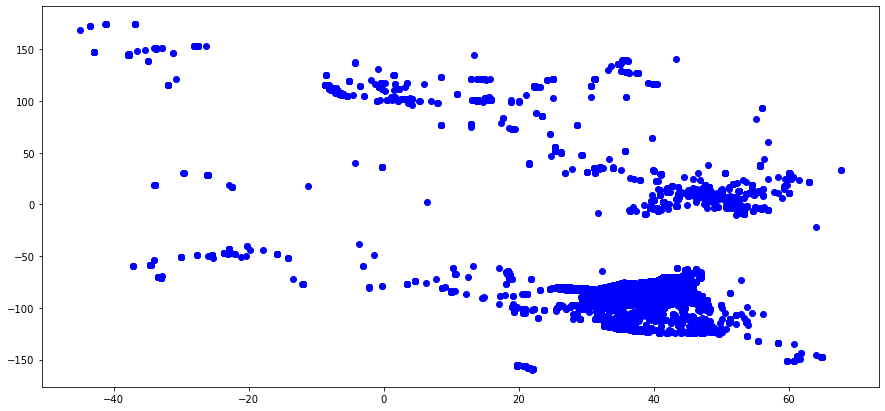

<Figure size 1440x504 with 0 Axes>

In [152]:
plt.plot(X["latitude"], X["longitude"], 'bo')
plt.figure(figsize(20,7))

In [221]:
more_15

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [161]:
cluster_centers_more_15 = clustering.cluster_centers_[more_15]

In [180]:
print(cluster_centers_more_15[0][:])

[ 40.7177164  -73.99183542]


In [163]:
len(cluster_centers_more_15)

592

In [181]:
y = []
y.append([33.751277, -118.188740])

In [182]:
y

[[33.751277, -118.18874]]

In [183]:
y.append([25.867736, -80.324116]) 

y.append([51.503016, -0.075479]) 

y.append([52.378894, 4.885084])

y.append([39.366487, 117.036146])

y.append([-33.868457, 151.205134]) 

In [184]:
y

[[33.751277, -118.18874],
 [25.867736, -80.324116],
 [51.503016, -0.075479],
 [52.378894, 4.885084],
 [39.366487, 117.036146],
 [-33.868457, 151.205134]]

In [187]:
dist_y = [i[1]-i[0] for i in y]

In [186]:
y[0][1]

-118.18874

In [188]:
dist_y

[-151.940017,
 -106.19185200000001,
 -51.578495000000004,
 -47.49381,
 77.669659,
 185.073591]

In [210]:
cluster_centers_more_15

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [  41.61853175,  -88.44556818],
       [  39.2494686 ,  -77.1821271 ],
       [  38.65877915,  -76.8856871 ]])

In [191]:
dist_cluster_centers_more_15 = [i[1]-i[0] for i in cluster_centers_more_15]

In [204]:
dist_cluster_centers_more_15

[-114.70955181717177,
 -145.45157774037673,
 -145.34826783250347,
 -129.50808714193442,
 -160.09801194765308,
 -115.93494854634233,
 -145.17999866992903,
 -118.15992541699993,
 -113.43690624842276,
 -169.9382885436886,
 -151.28830256579715,
 -152.30910658118117,
 -138.24524870559736,
 -128.01030289831186,
 -114.60022973049374,
 -144.72241058033353,
 -115.11441629692456,
 -152.47448467258263,
 -150.05901136039716,
 -129.57291797025954,
 -159.29515836746816,
 -109.91993016950379,
 -149.8649831818532,
 -143.14824830441904,
 -152.47928594422177,
 -125.14501145944955,
 -130.95486538276413,
 -151.7085556048669,
 -159.47757886813665,
 -106.0037504567929,
 -168.19976363602606,
 -145.88375044180373,
 -151.53309192753852,
 113.05742646876284,
 -110.41451967964603,
 -152.3838269582335,
 -133.6825335772725,
 -116.0704449980496,
 -123.0355590917521,
 -160.05952549200038,
 -122.99678733827477,
 -125.92669971475469,
 -152.23507715812661,
 -169.81389939997098,
 -115.90091959884136,
 -145.1426592000006

In [195]:
dist_y_square = [i*i for i in dist_y]

In [196]:
dist_y_square

[23085.768765960293,
 11276.709431189907,
 2660.3411464650253,
 2255.6619883161,
 6032.575929176281,
 34252.23408563528]

In [197]:
dist_cluster_centers_more_15_square = [i*i for i in dist_cluster_centers_more_15]

In [198]:
dist_cluster_centers_more_15_square

[13158.281278096416,
 21156.161467164857,
 21126.118961909164,
 16772.34463516288,
 25631.37342959087,
 13440.912294443042,
 21077.232013800596,
 13961.767974550985,
 12867.931699213454,
 28879.021913157965,
 22888.150493240184,
 23198.063947557606,
 19111.74878967247,
 16386.63764811755,
 13133.21265428194,
 20944.576124182633,
 13251.328839381651,
 23248.468476169637,
 22517.706890459805,
 16789.14107132761,
 25374.94747931676,
 12082.39104846859,
 22459.513184097144,
 20491.42099262361,
 23249.932642059746,
 15661.273893185758,
 17149.176767417874,
 23015.48584371499,
 25433.098161642745,
 11236.795110906021,
 28291.160487215035,
 21282.068642966467,
 22962.27794911984,
 12781.981679739716,
 12191.36615608694,
 23220.83071843685,
 17871.01978363859,
 13472.348202045256,
 15137.748801020025,
 25619.051700724318,
 15128.209695536789,
 15857.533701049999,
 23175.518717340765,
 28836.760429423462,
 13433.023163857088,
 21066.391519647517,
 14504.547067312966,
 23179.901710662067,
 13215

In [200]:
min_for_X = []
for X_dist in dist_cluster_centers_more_15_square:
    dist_X_y = [(X_dist+dist_y)**(0.5) for dist_y in dist_y_square]
    min_for_X.append(min(dist_X_y))

In [201]:
min_for_X

[124.15290277078711,
 153.00922670048678,
 152.91102298469283,
 137.9420408123607,
 166.9941179140959,
 125.28597001563719,
 152.7510851094574,
 127.34767356676402,
 122.9780211563414,
 176.45023066426992,
 158.56800585728598,
 159.542238720264,
 146.17595827627937,
 136.53680689262384,
 124.0519030188495,
 152.3162437578433,
 124.527068654561,
 159.70012668900966,
 157.3955808743559,
 138.00290960571704,
 166.22457540217349,
 119.74160946297945,
 157.21060769685118,
 150.82136115597058,
 159.70471073320238,
 133.85415899964354,
 139.30125180964447,
 158.96901532069415,
 166.39939948797544,
 116.157036374135,
 174.7764929146112,
 153.4201115606509,
 158.80157410251306,
 122.6280704735087,
 120.195790876399,
 159.61357306555402,
 141.86853693456732,
 125.41136388047678,
 131.8840808791422,
 166.95722113475782,
 131.84791118501988,
 134.58527292897278,
 159.47156707594263,
 176.33043531319137,
 125.2544815652246,
 152.71559680649392,
 129.46122607031444,
 159.4853087245912,
 124.38356541

In [202]:
len(min_for_X)

592

In [205]:
min(min_for_X)

47.57215860593586

In [207]:
min_for_X.index(min(min_for_X))

478

In [208]:
min_for_X[478]

47.57215860593586

In [218]:
print(str(cluster_centers_more_15[478]).strip('[').strip(']'))

32.05950188 34.78865671


In [219]:
with open('answer.txt', 'w') as f:
    f.write(str(cluster_centers_more_15[478]).strip('[').strip(']'))